<h3 style="text-align:right">Ithar Khaterchi MR2NN</h3>

<h1 style="text-align:center"> Quantum Teleportation</h1>

* Alice wants to transfers an unknown quantum state $\Psi$ 
* Alice and Bob use a third party : Telamon

TELAMON : send an entangled qubit pair.

ALICE : using one entangled pair of qubits shared by TELAMON, she sends the results to BOB over a classical communication channel.

BOB : prefoms some operation based on the classical information sent by ALICE

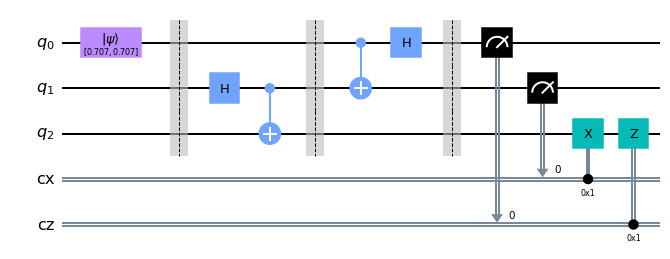

TELAMON : q1,q2

ALICE : q0,q1

BOB : q2

depending on the state of the classical bits sent to BOB, he applies to q2 : 

00  → Do nothing

01  →  Z

10  →  X

11  →  Z X

### Alice sends $|\Psi> = |+>$ 

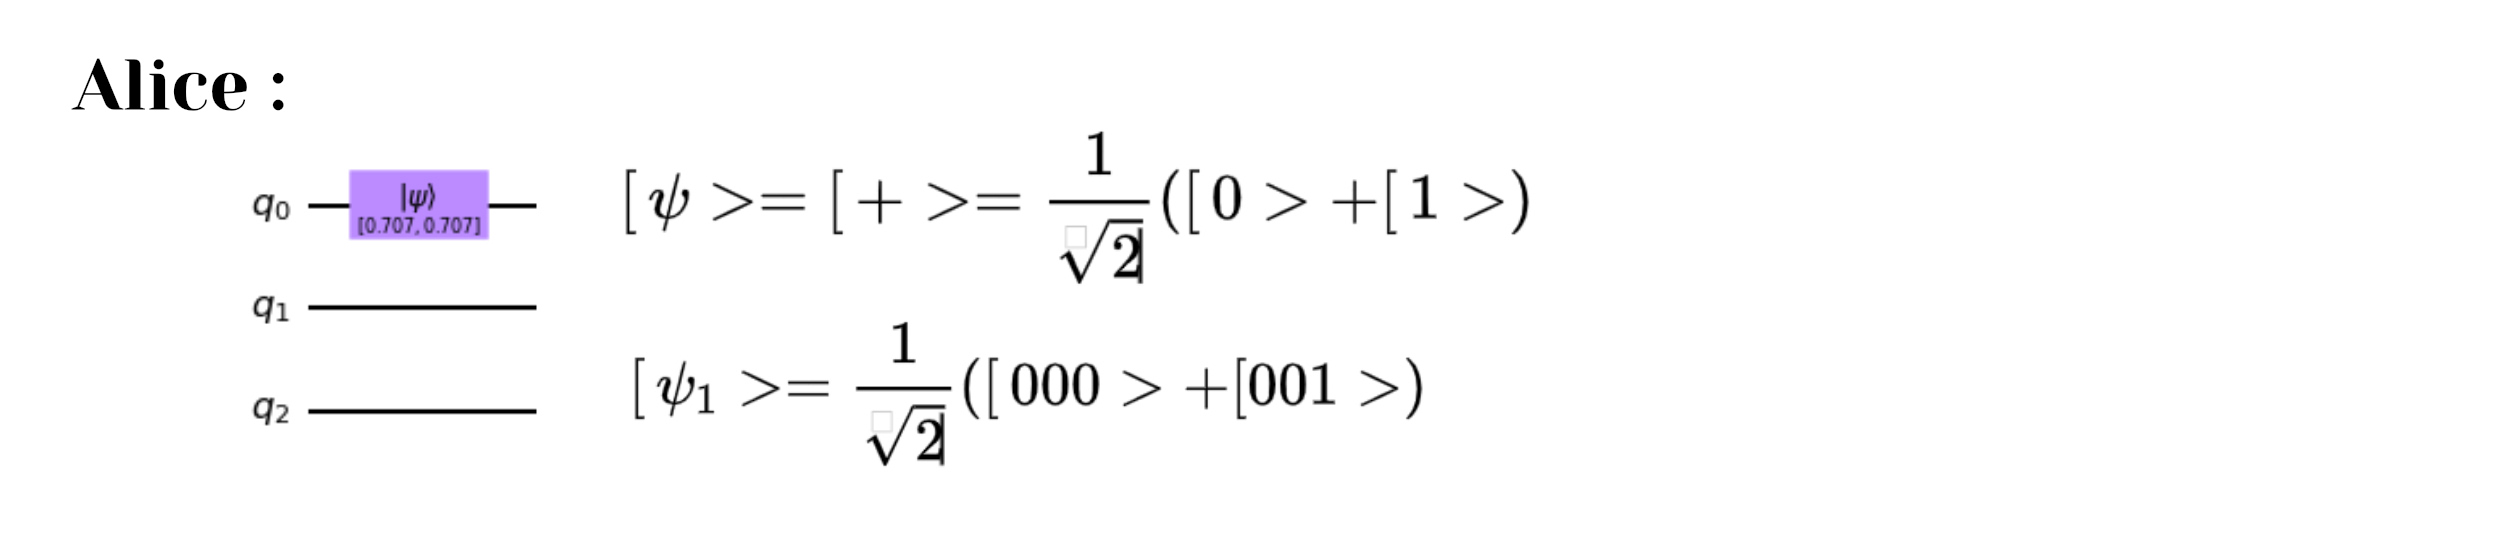

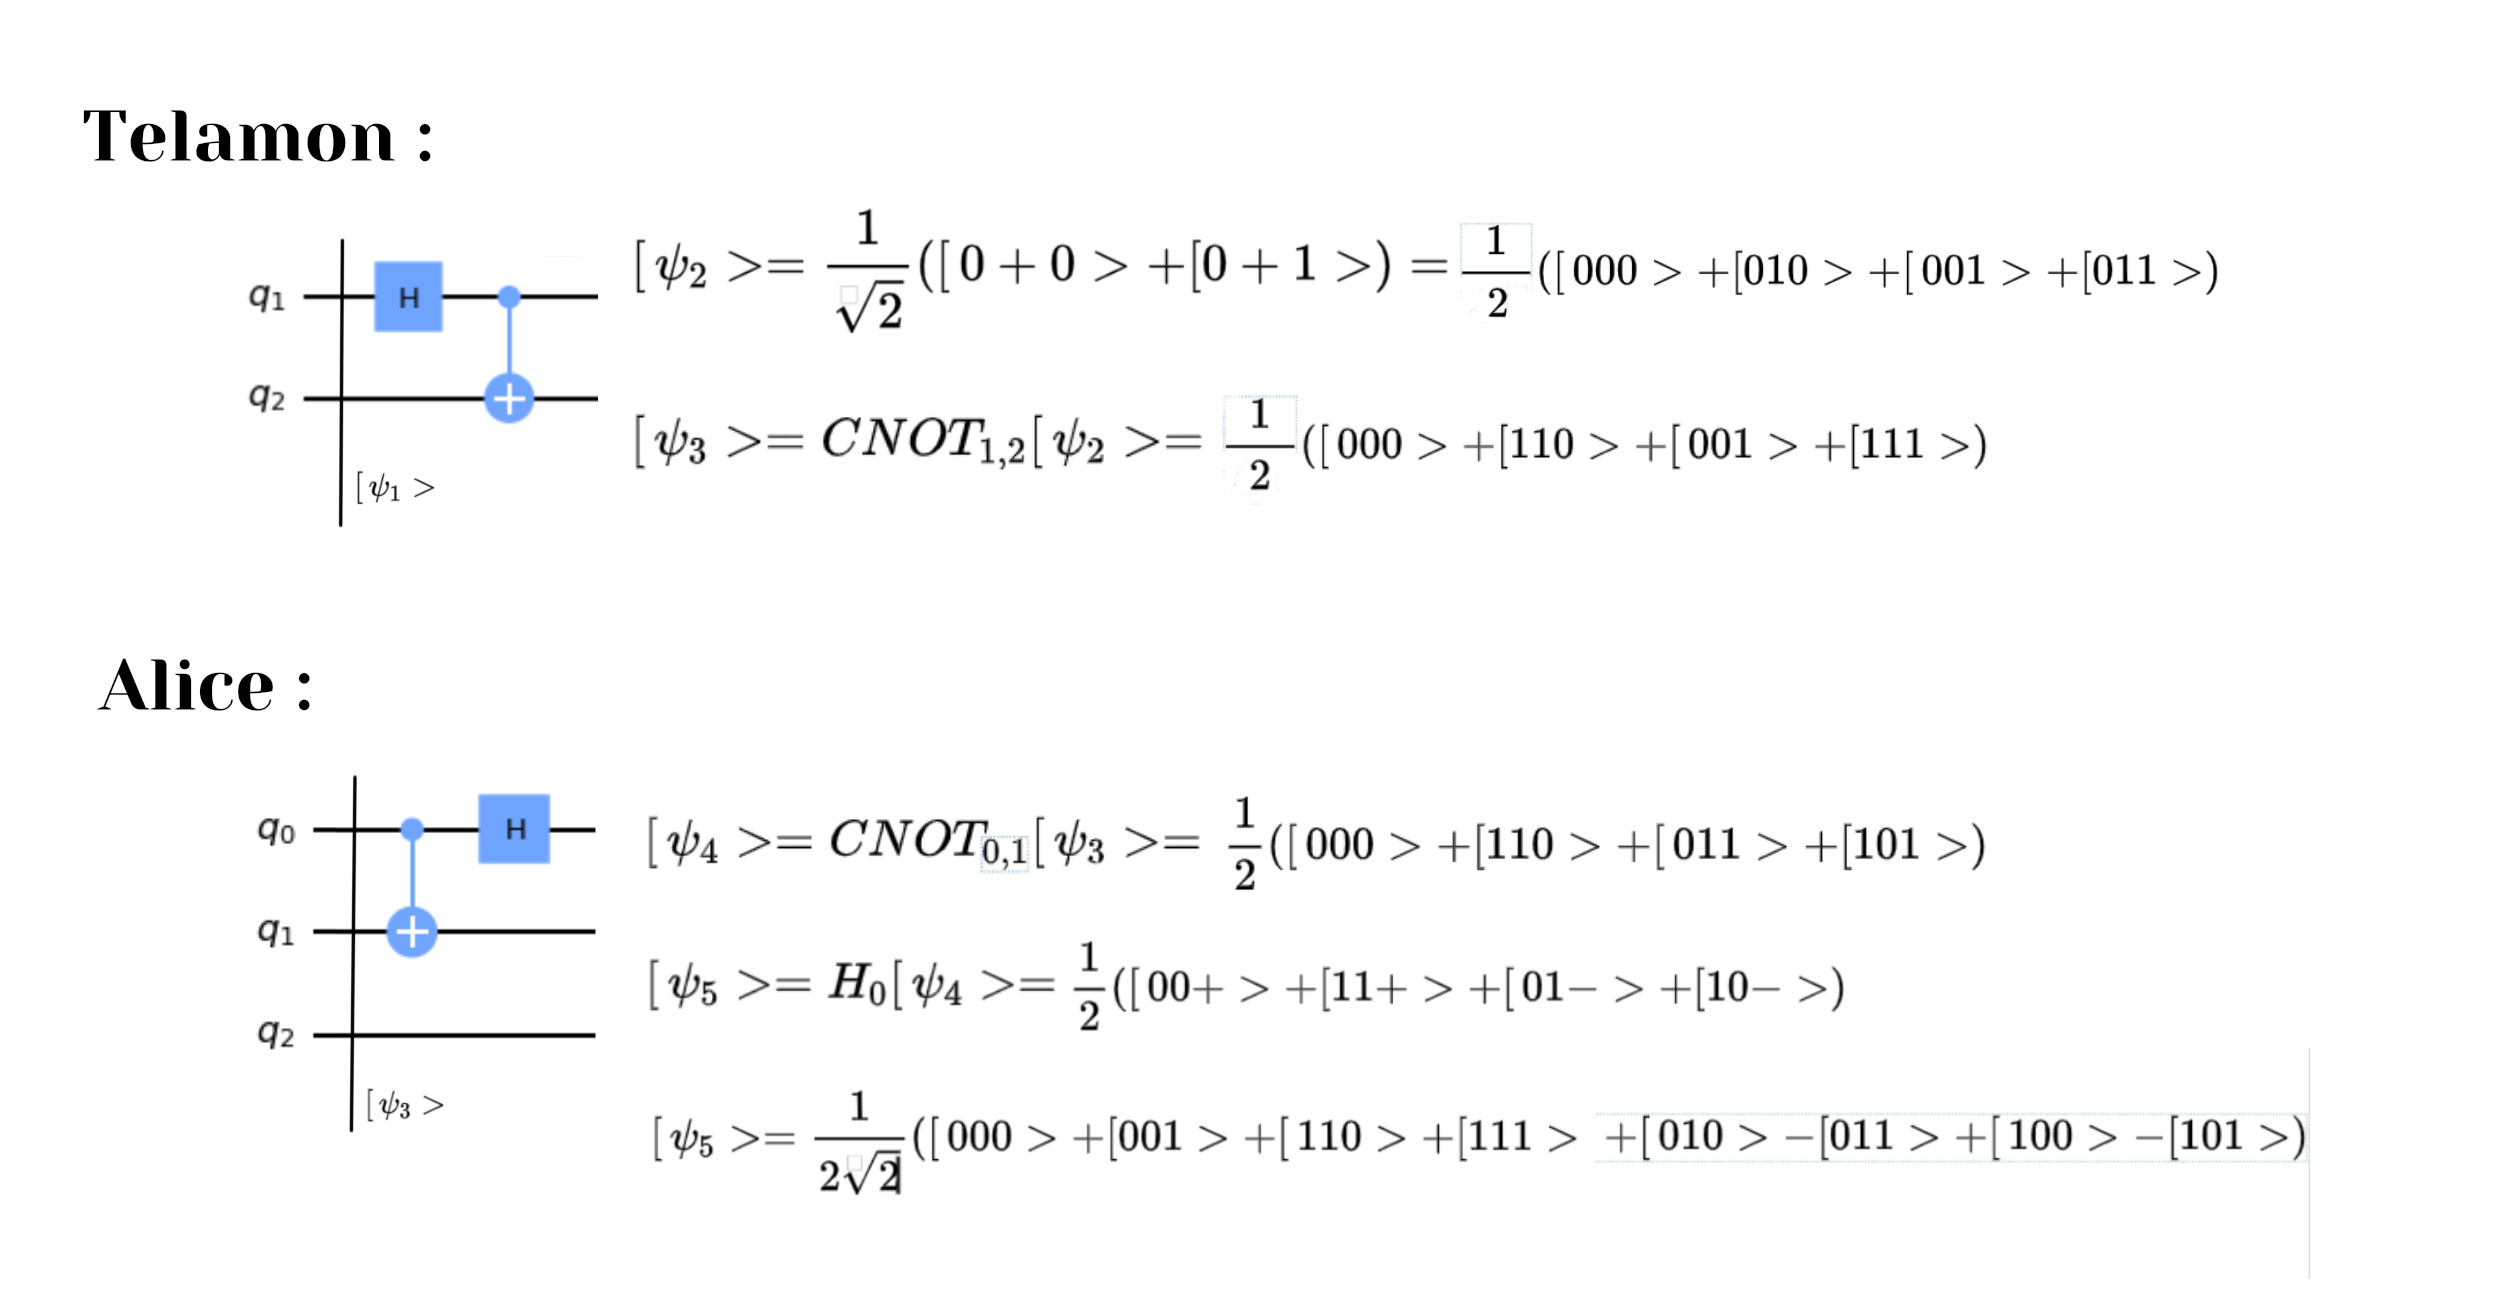

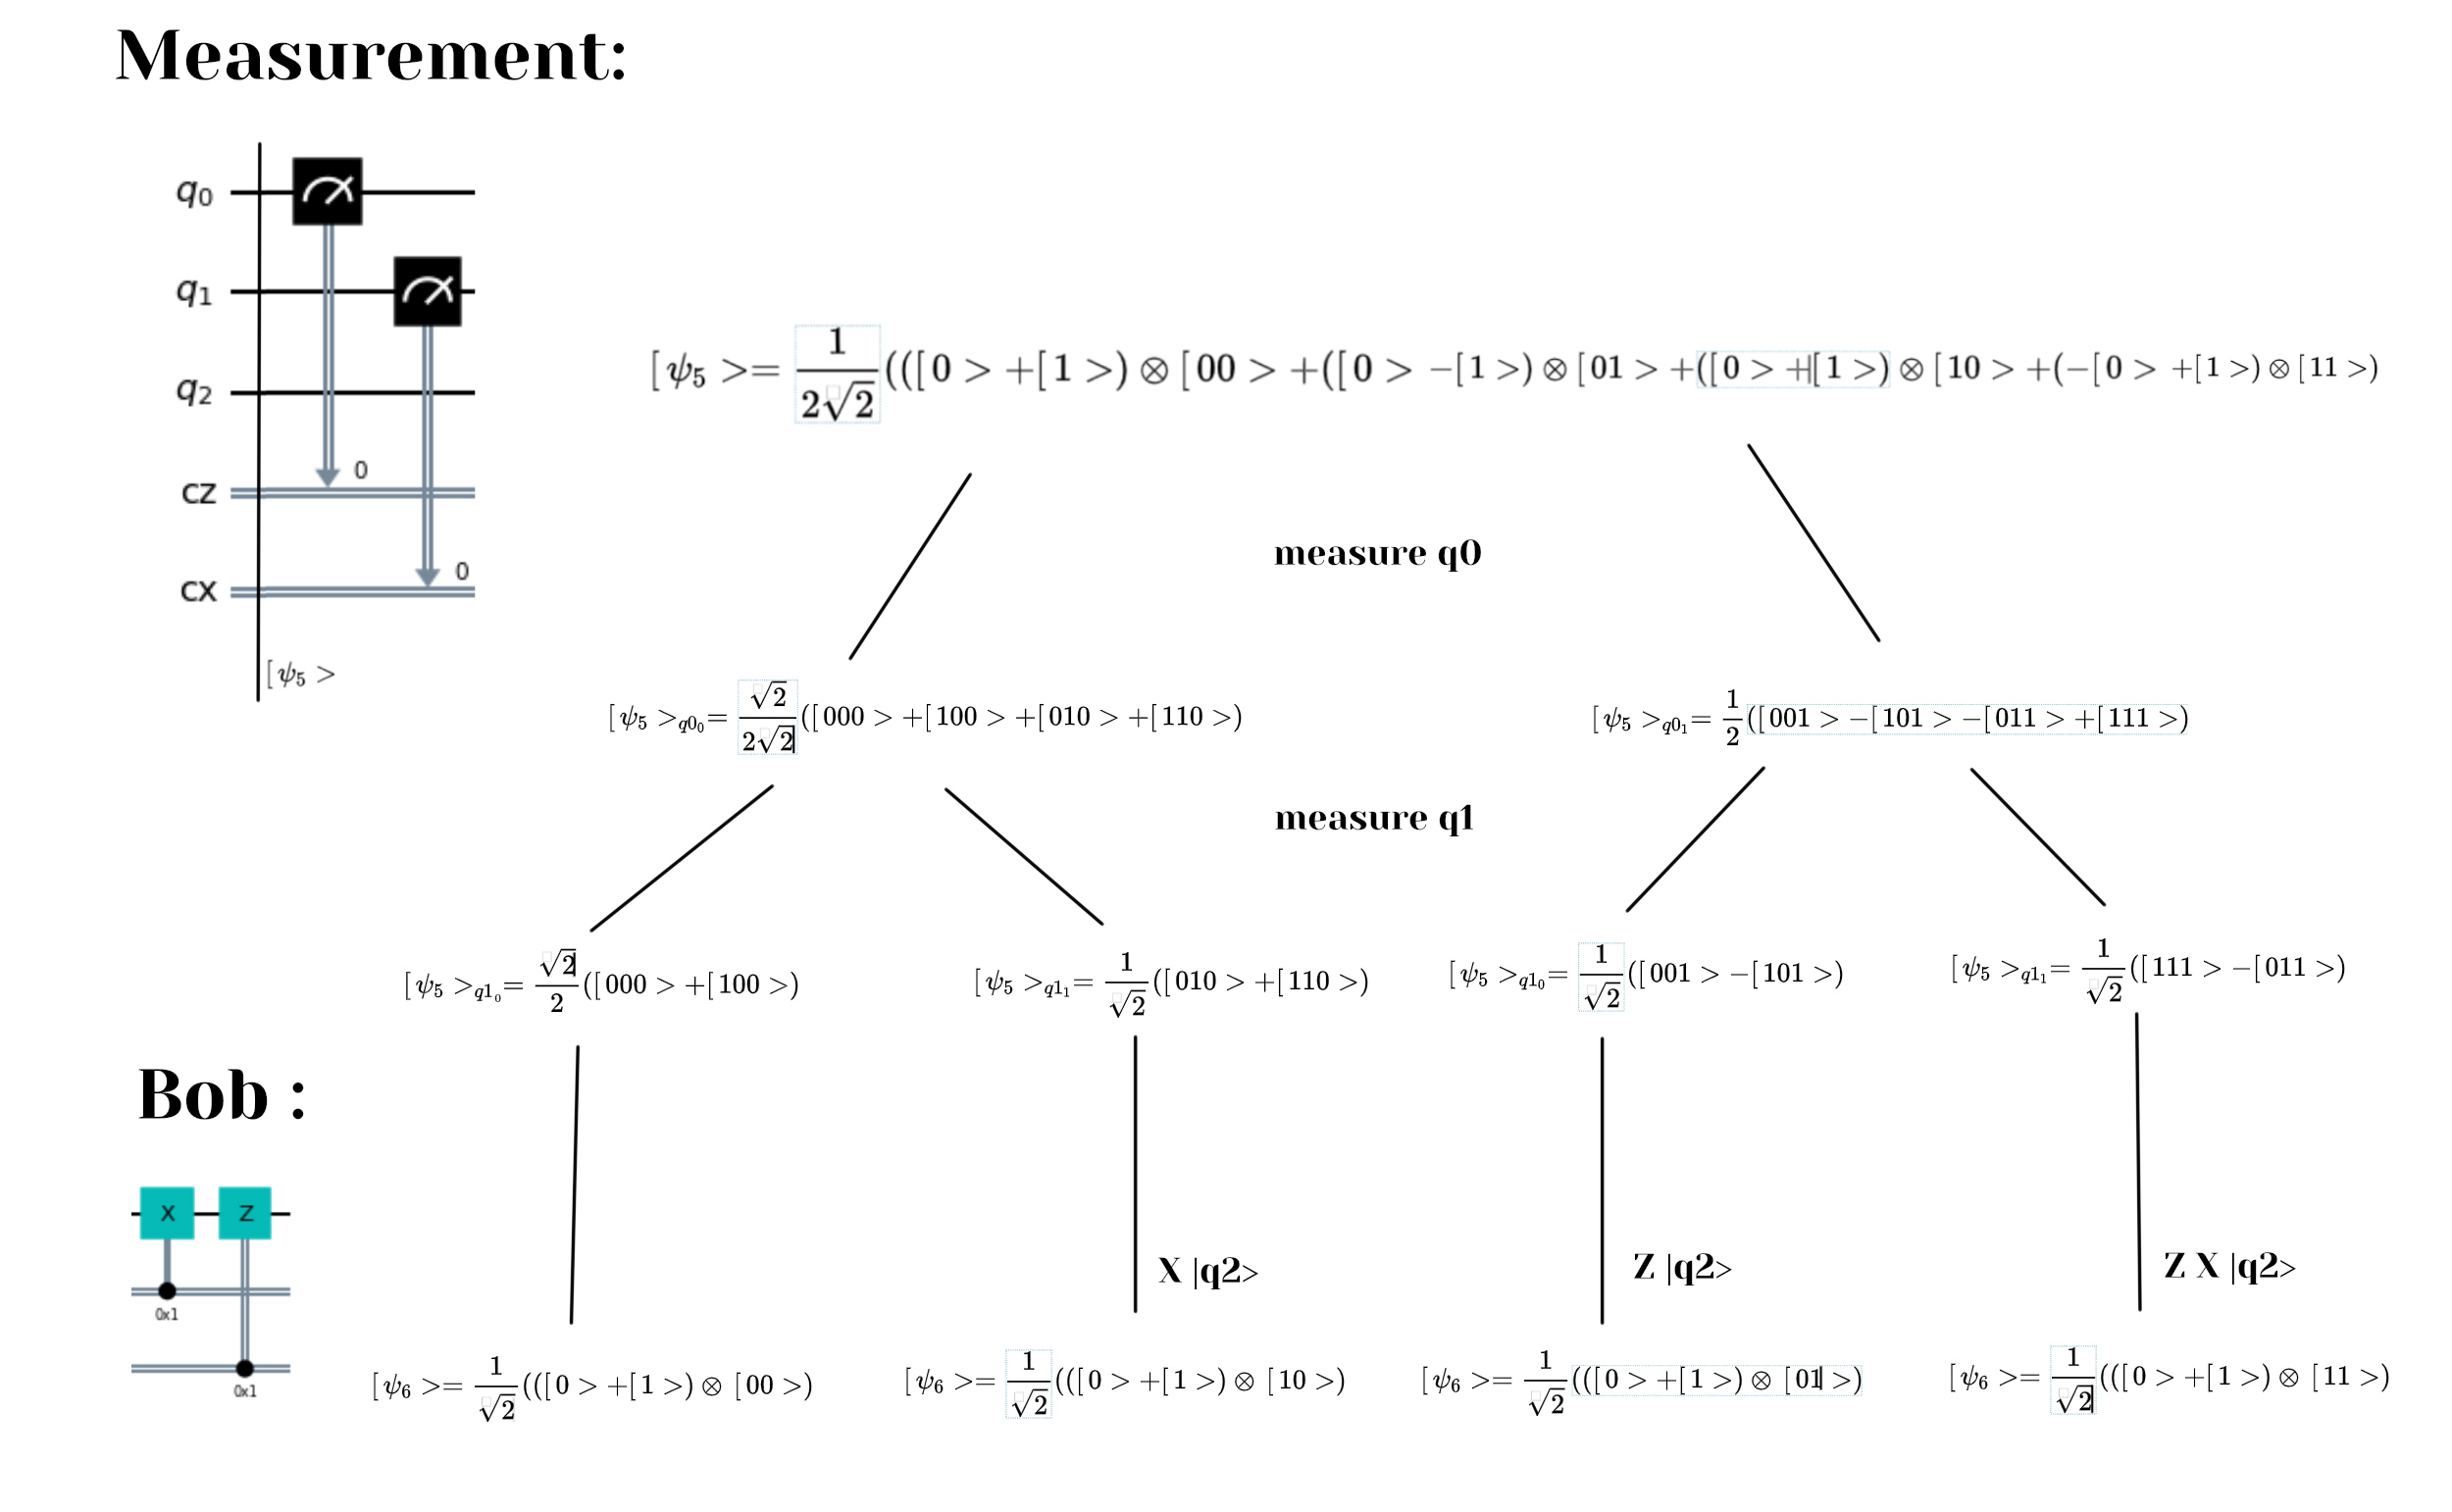

### → BOB receive $|\Psi> = |+>$  from ALICE

In [1]:
import numpy as np

from qiskit import *
from qiskit.visualization import *
from qiskit.quantum_info import Statevector
from qiskit.extensions import Initialize

<IPython.core.display.Latex object>

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


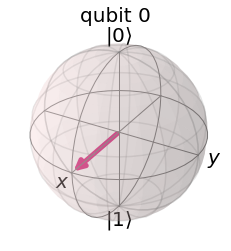

In [2]:
psi = Statevector.from_label('+')
display(array_to_latex(psi, prefix="|\\psi\\rangle ="))
plot_bloch_multivector(psi)

In [3]:
qubits = 3
q = QuantumRegister(qubits, 'q')
cx = ClassicalRegister(1, 'cx')
cz = ClassicalRegister(1, 'cz')

qc = QuantumCircuit(q,cx,cz)


def Telamon(qc, x, y):
    qc.h(x) 
    qc.cx(x,y)
    qc.barrier()
    
def Alice(qc, x, y): 
    qc.cx(x,y)
    qc.h(x) 
    qc.barrier()   
    
#measurments
def measurmentq(q0,c0,q1,c1):
    qc.measure(q0,c0)
    qc.measure(q1,c1)
    
def Bob(qc, q2):
    qc.x(q2).c_if(cx, 1) 
    qc.z(q2).c_if(cz, 1)

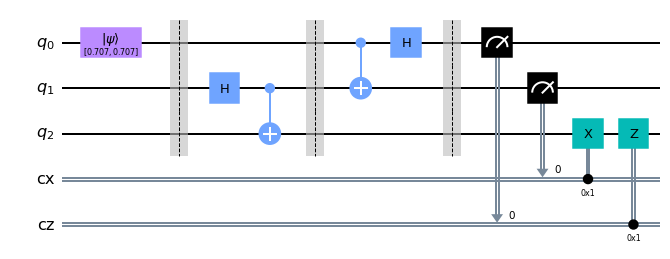

In [4]:
#initialize Alice's q0 to psi
init_gate = Initialize(psi)
qc.append(init_gate, [0])
qc.barrier()

Telamon(qc,1,2)
Alice(qc,0,1) 

measurmentq(q[0],cz,q[1],cx)

Bob(qc, q[2])

qc.draw()

In [5]:
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
out_vector = sim.run(qc).result().get_statevector()

display(array_to_latex(out_vector, prefix="|\\psi\\rangle ="))

<IPython.core.display.Latex object>

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


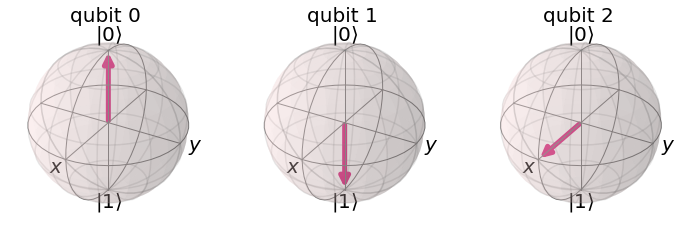

In [6]:
plot_bloch_multivector(out_vector)

### ==> q2 = |+> 

BOB recieves $|\Psi>$ from ALICE